In [11]:
import numpy as np
import quantities as pq
import elephant
from elephant.statistics import isi
#import vizi
#import misc
import matplotlib.pyplot as plt
import matplotlib
import neo
import seaborn as sns
%matplotlib inline
 
from elephant.conversion import BinnedSpikeTrain
from quantities import Hz, s, ms

from scipy import stats
import matplotlib.colors as colors

In [2]:
def ProcessSelfCorr(data):
    corr = elephant.spike_train_correlation.corrcoef(BinnedSpikeTrain(data[:], binsize=100*ms))
    x = corr[np.tril_indices(corr.shape[0])]
    return x

In [3]:
data1 = np.load('data/data1.npy')
data2 = np.load('data/data2.npy')
data3 = np.load('data/data3.npy')
data4 = np.load('data/data4.npy')
data5 = np.load('data/data5.npy')
data6 = np.load('data/data6.npy')

p1 = ProcessSelfCorr(data1)
p2 = ProcessSelfCorr(data2)
p3 = ProcessSelfCorr(data3)
p4 = ProcessSelfCorr(data4)
p5 = ProcessSelfCorr(data5)
p6 = ProcessSelfCorr(data6)

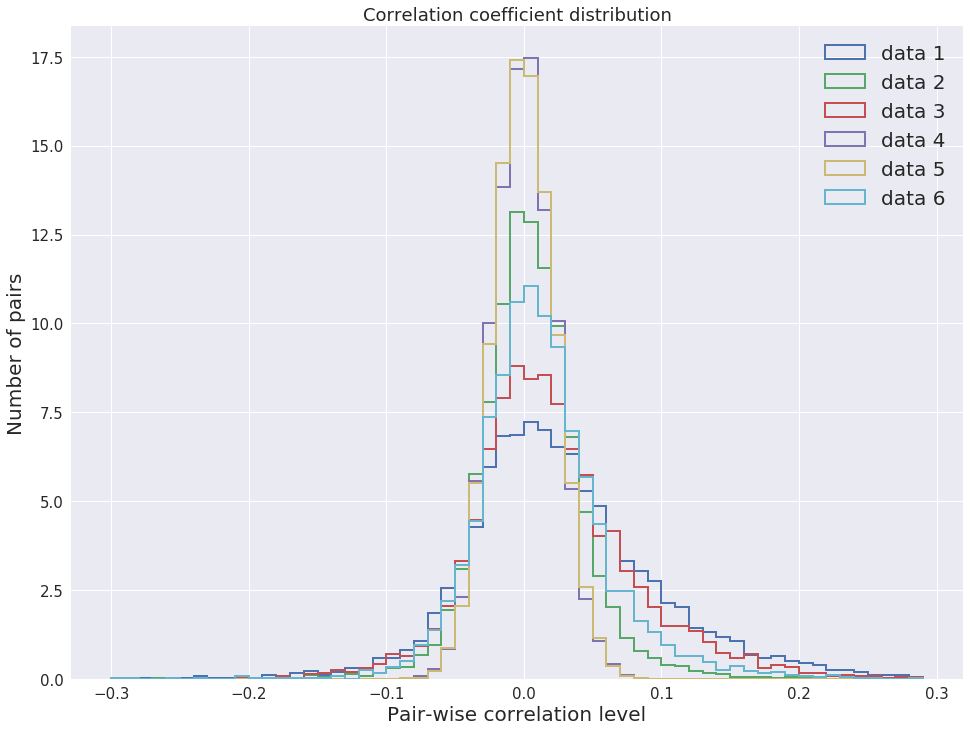

In [21]:
bins = np.arange(-.3, .3, 0.01)

matplotlib.rcParams['figure.figsize'] = [16, 12]
plt.hist(p1, bins=bins, histtype='step', lw=2, label='data 1', density=True)
plt.hist(p2, bins=bins, histtype='step', lw=2, label='data 2', density=True)
plt.hist(p3, bins=bins, histtype='step', lw=2, label='data 3', density=True)
plt.hist(p4, bins=bins, histtype='step', lw=2, label='data 4', density=True)
plt.hist(p5, bins=bins, histtype='step', lw=2, label='data 5', density=True)
plt.hist(p6, bins=bins, histtype='step', lw=2, label='data 6', density=True)
plt.legend(loc='best', fontsize=20)
plt.xlabel('Pair-wise correlation level', fontsize=20)
plt.ylabel('Number of pairs', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Correlation coefficient distribution')
plt.savefig('corr_coeff_distr.png')
plt.show()


In [5]:
dists = [p1,p2,p3,p4,p5,p6]

Res = np.zeros((len(dists), len(dists)))
for i in range(len(dists)):
    for j in range(len(dists)):
        Res[i,j] = stats.ks_2samp(dists[i], dists[j])[1]

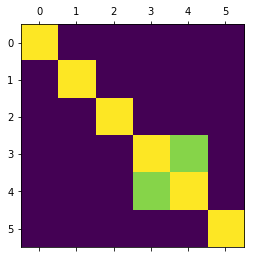

In [6]:
plt.matshow(Res, )

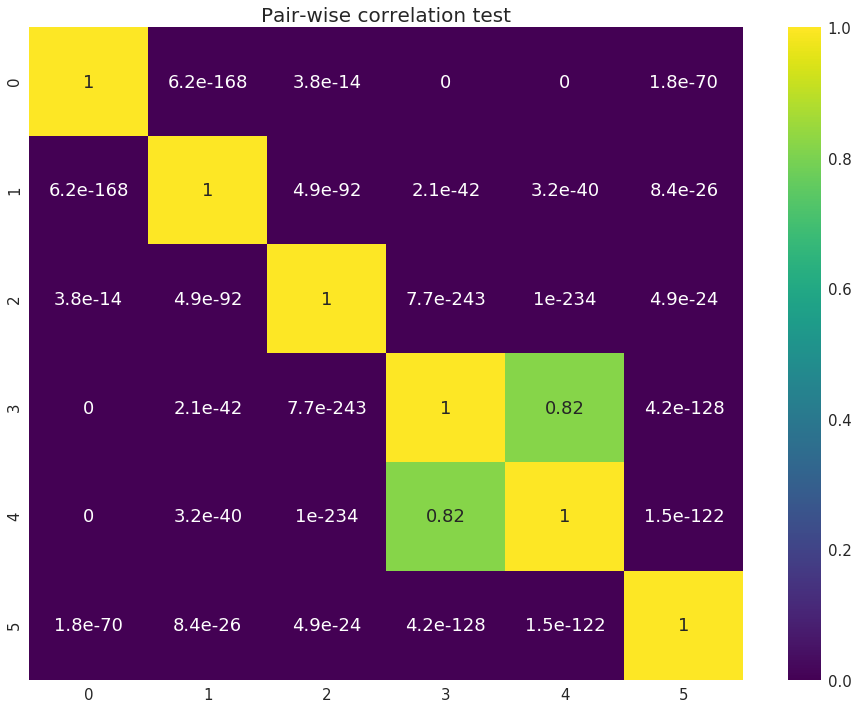

In [19]:
sns.set(font_scale=1.5)
sns.heatmap(Res, annot=True, cmap='viridis')
plt.title('Pair-wise correlation test', fontsize=20)
plt.savefig('pair_wise_correlation_test.png')